In [19]:
import tensorflow as tf           # 导入tensorflow库
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打印shape: (55000, 784)


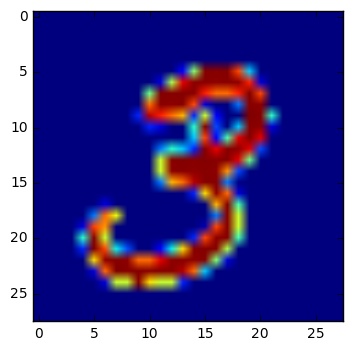

In [20]:
print("输入数据:",mnist.train.images)
print("输入数据打印shape:",mnist.train.images.shape)
import pylab
im = mnist.train.images[1] # 取出第一行数据，也就是第一张图片
im = im.reshape(-1,28)  # 变成28*28矩阵
pylab.imshow(im)  # 绘制图片
pylab.show()

In [21]:
print("测试数据打印shape:", mnist.test.images.shape)
print("验证数据打印shape:", mnist.validation.images.shape)

测试数据打印shape: (10000, 784)
验证数据打印shape: (5000, 784)


In [22]:
# 分析图片的特点，定义变量
tf.reset_default_graph()
# 定义占位符
x = tf.placeholder(tf.float32, [None, 784])  # MNIST数据集的维度是28*28=784
y = tf.placeholder(tf.float32, [None, 10])   # 数据0-9，共10个类别

In [23]:
# 构建模型
# 定义学习参数
W = tf.Variable(tf.random_normal([784, 10])) 
b = tf.Variable(tf.zeros([10]))
# 定义输出节点
pred = tf.nn.softmax(tf.matmul(x, W)+b)
#定义反向传播的结构
# 损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# 定义参数
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
# 训练模型并输出中间状态参数
training_epochs = 25   # 迭代次数
batch_size = 100       # 一次100条数据训练
display_step = 1       # 步数
saver = tf.train.Saver()
model_path = "log/521model.ckpt"
# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())   # Initializing OP
    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            # 计算平均loss值
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print( " Finished!")
    
    
     # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))   # tf.argmax返回onehot编码中数值为1的元素的下标
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  # 将张量投射到一个新的类型上。
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

    # 保存模型
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 7.903159829
Epoch: 0002 cost= 4.239799590
Epoch: 0003 cost= 2.998095283
Epoch: 0004 cost= 2.392936198
Epoch: 0005 cost= 2.026616419
Epoch: 0006 cost= 1.788247241
Epoch: 0007 cost= 1.616375863
Epoch: 0008 cost= 1.490991904
Epoch: 0009 cost= 1.393623265
Epoch: 0010 cost= 1.313422589
Epoch: 0011 cost= 1.249830943
Epoch: 0012 cost= 1.194653919
Epoch: 0013 cost= 1.149582300
Epoch: 0014 cost= 1.107407806
Epoch: 0015 cost= 1.073275603
Epoch: 0016 cost= 1.041508658
Epoch: 0017 cost= 1.013776049
Epoch: 0018 cost= 0.988726762
Epoch: 0019 cost= 0.963832154
Epoch: 0020 cost= 0.943452983
Epoch: 0021 cost= 0.924298011
Epoch: 0022 cost= 0.905477230
Epoch: 0023 cost= 0.889784586
Epoch: 0024 cost= 0.874358839
Epoch: 0025 cost= 0.860119969
 Finished!
Accuracy: 0.8281
Model saved in file: log/521model.ckpt


Starting 2nd session...
INFO:tensorflow:Restoring parameters from log/521model.ckpt
Accuracy: 0.8281
[8 3] [[5.36388718e-04 1.71031203e-10 1.98924317e-04 3.38127611e-05
  2.42990291e-06 2.52733775e-03 9.22567622e-09 3.74511403e-12
  9.96698797e-01 2.24590440e-06]
 [1.23146082e-09 1.09528294e-07 1.85889203e-05 9.34942007e-01
  3.07014917e-12 6.50216714e-02 2.33864661e-08 3.29014906e-11
  1.76592876e-05 1.65270991e-11]] [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


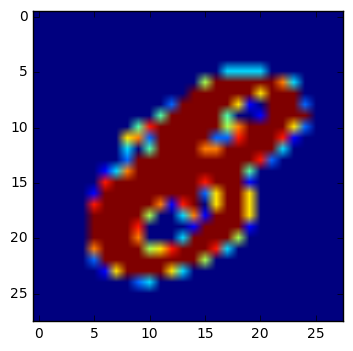

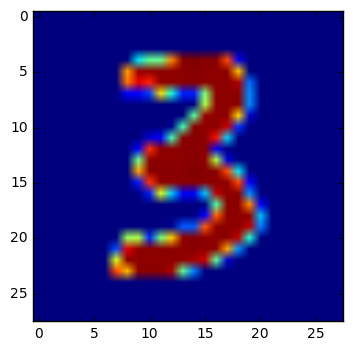

In [29]:
#读取模型
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    
     # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval,predv = sess.run([output,pred], feed_dict={x: batch_xs})
    print(outputval,predv,batch_ys)

    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()